# Выпуклые множества и функции
<b>Определение.</b> Множество $\mathcal{D}$ называется <b>выпуклым</b>, если для любых $x, y\in\mathcal{D}$, $t\in [0, 1]$ выполняется
$$
tx+(1-t)y\in\mathcal{D}.
$$
точки $tx+(1-t)y$ образуют отрезок, соединяющий $x$ и $y$.

<b>Определение.</b> Пусть $\mathcal{D}$ -- выпуклое множество. Функция $f$ называется <b>выпуклой</b>, если для любых $x, y\in\mathcal{D}$, $t\in [0, 1]$ выполняется
$$
f(tx+(1-t)y)\leq tf(x)+(1-t)f(y)
$$
геометрически это означает, что отрезок, соединяющий точки $(x, f(x))$, $(y, f(y))$, находится полностью выше графика $f$ на отрезке от $x$ до $y$.

In [1]:
from ipywidgets import interact, fixed
import matplotlib.pyplot as plt
import numpy as np
# Рендеринга tex'а в матплотлибе потребует системнй бэкенд
# В win можно поставить miktex например через anaconda
# в linux без труда ставится пакетными менеджерами
plt.rcParams["text.usetex"] = True

In [2]:
def f(x):
    return (x-1)**2-1

def line(t, y1, y2):
    #return (t - xy1[0]) * (xy2[1] - xy1[1]) / (xy2[0] - xy1[0]) + xy1[1]
    return t * y1 + (1 - t) * y2

@interact(x=(-2.0, 3.0, 0.1), y=(-2.0, 3.0, 0.1), t=(0.0, 1.0, 0.05))
def g(x=-1.0, y=2.0, t=0.6):
    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_axes([0, 0, 1, 1])    
    
    r = np.arange(-2, 3.1, 0.1)
    
    z = t * x + (1 - t) * y
    
    ax.plot([_x for _x in r], [f(_x) for _x in r], color='black')
    ax.plot([y, x], [line(0, f(x), f(y)), line(1, f(x), f(y))], color='blue')
    ax.scatter([x, y, z, z], [f(x), f(y), f(z), line(t, f(x), f(y))], color='black')
    ax.text(x + 0.1, f(x) + 0.1, "$f(x)$", fontsize=25)
    ax.text(y - 0.2, f(y) + 0.4, "$f(y)$", fontsize=25)
    ax.text(z - 0.2, f(z) + 0.4, "$f(tx+(1-t)y)$", fontsize=25)
    ax.text(z - 0.2, line(t, f(x), f(y)) + 0.3, "$tf(x)+(1-t)f(y)$", fontsize=25)
    
    
    plt.close(fig)
    return fig

interactive(children=(FloatSlider(value=-1.0, description='x', max=3.0, min=-2.0), FloatSlider(value=2.0, desc…

<b>Определение.</b> Пусть $\mathcal{D}$ -- выпуклое множество. Функция $f$ называется <b>$m$-сильно выпуклой</b>, если для любых $x, y\in\mathcal{D}$, $t\in [0, 1]$ выполняется
$$
f(tx+(1-t)y)\leq tf(x)+(1-t)f(y)-t(1-t)\frac{m}{2}\|x-y\|^2
$$
геометрически разница заключается в том, что вместо отрезка между точками $x, y$ ограничителем теперь служит кусочек параболы, проходящей через $x, y$ и старшим коэффициентом $\frac{m}{2}$. 

In [3]:
def par(t, m, x1, x2, y1, y2):
    return t * y1 + (1 - t) * y2 - t * (1 - t) * m * (x1 - x2) ** 2 / 2

@interact(m=(0.0, 2.0, 0.05), x=fixed(-1.0), y=fixed(2.0), t=fixed(0.6))
def strong_convexity(x=-1.0, y=2.0, t=0.6, m=0.5):
    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_axes([0, 0, 1, 1])    
    
    r = np.arange(-2, 3.1, 0.1)
    q = np.arange(0.0, 1.05, 0.05)
    
    z = t * x + (1 - t) * y
    
    
    ax.plot([_x for _x in r], [f(_x) for _x in r], color='black')
    ax.plot([_t * x + (1 - _t) * y for _t in q], [par(_t, m, x, y, f(x), f(y)) for _t in q], color='blue')
    ax.scatter([x, y, z, z], [f(x), f(y), f(z), par(t, m, x, y, f(x), f(y))], color='black')
    ax.text(x + 0.1, f(x) + 0.1, "$f(x)$", fontsize=25)
    ax.text(y - 0.2, f(y) + 0.4, "$f(y)$", fontsize=25)    
    
    
    plt.close(fig)
    return fig

interactive(children=(FloatSlider(value=0.5, description='m', max=2.0, step=0.05), Output()), _dom_classes=('w…

## Эквивалентные определения выпуклости для дифференцируемых функций
<b>Теорема (об условиях выпуклости первого порядка).</b> Если $f$ дифференцируема, то $m$-сильная выпуклость эквивалентна тому, что для любых $x,y$ выполняется
$$
f(y)\geq f(x)+\nabla f(x)^T(y-x)+\frac{m}{2}\|x-y\|^2
$$

In [4]:
def lower_par(x, y, f_x, f_deriv, m):
    return  f_x + f_deriv * (y - x) + m * (y - x) ** 2 / 2

def df(x):
    return 2 * (x - 1)

@interact(m=(0.0, 2.0, 0.05), x=fixed(-1.0), y=fixed(2.0), t=fixed(0.6))
def convexity_lower_bound(x=-1.0, y=2.0, t=0.6, m=1.45):
    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_axes([0, 0, 1, 1])    

    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    for name, spine in ax.spines.items():
        spine.set_visible(False)
        spine.set_visible(False)
    
    r = np.arange(-2, 3.1, 0.1)
    
    ax.plot([_x for _x in r], [f(_x) for _x in r], color='black')
    ax.plot([_x for _x in r], [lower_par(x, _y, f(x), df(x), m) for _y in r], color='blue')
    ax.scatter([x, y, y], [f(x), f(y), lower_par(x, y, f(x), df(x), m)], color='black')
    ax.text(x + 0.1, f(x) + 0.1, "$f(x)$", fontsize=25)
    ax.text(y - 0.2, f(y) + 0.6, "$f(y)$", fontsize=25)    
    ax.text(y - 1.7, lower_par(x, y, f(x), df(x), m) - 0.8, r"$f(x)+\nabla f(x)^T(y-x)+\frac{m}{2}\|y-x\|^2$", fontsize=25)    
    
    
    plt.close(fig)
    return fig
convexity_lower_bound();

interactive(children=(FloatSlider(value=1.45, description='m', max=2.0, step=0.05), Output()), _dom_classes=('…

<b>Доказательство.</b> "$\Rightarrow$" Если $f$ выпукла и дифференцируема, то для $0<t<1$
$$
f(x+t(y-x))\leq f(x)+t(f(y)-f(x))-t(1-t)\frac{m}{2}||x-y||^2.
$$
После деления на $t$ и переноса слагаемых получаем
$$
f(y)\geq f(x)+\frac{f(x+t(y-x))-f(x)}{t}+(1-t)\frac{m}{2}||x-y||^2.
$$
Устремляя $t$ к нулю получаем желаемое неравенство.

"$\Leftarrow$" Если $x, y\in \mathcal{D}$, $z=tx+(1-t)y$ и выполняются условия
$$
f(x)\geq f(z)+\nabla f(z)^T(x - z)+\frac{m}{2}||x-z||^2,\\ f(y)\geq f(z)+\nabla f(z)^T(y - z)+\frac{m}{2}||y-z||^2,
$$
то складывая первое неравенство умноженное на $t$ и второе неравенство умноженное на $1-t$, учитывая $x-z=(1-t)(x-y),~y-z=t(y-x)$ получаем
$$
\begin{array}{rl}
tf(x)+(1-t)f(y) &\geq f(z)+t(1-t)\nabla f(z)^T(x-y)+(1-t)t\nabla f(z)^T(y-x)\\
&~~+t^2(1-t)\frac{m}{2}||x-y||^2+(1-t)^2t\frac{m}{2}||x-y||^2\\
&=f(z)+t(1-t)\frac{m}{2}||x-y||^2~~\#
\end{array}
$$

<b>Следствие</b>. Если $f$ дифференцируема, то выпуклость эквивалентна
$$
(\nabla f(x)-\nabla f(y))^T(x - y)\geq m||x-y||^2~~~\forall x, y.
$$
<b>Доказательство</b>. "$\Rightarrow$" складываем два неравенства
$$
f(y)\geq f(x)+\nabla f(x)^T(y-x)+\frac{m}{2}||x-y||^2
$$
и
$$
f(x)\geq f(y)+\nabla f(y)^T(x-y)+\frac{m}{2}||x-y||^2
$$
"$\Leftarrow$" 
используя формулу Ньютона-Лейбница для функции $g(t)=f(x+t(y-x))$
$$
\begin{array}{rl}
f(y)&=f(x)+\int_0^1\nabla f(x + t(y-x))^T(y-x)dt\\
&=f(x)+\nabla f(x)^T(y-x) + \int_0^1\underbrace{(\nabla f(x + t(y-x))-\nabla f(x))^T(y-x)}_{\geq tm||y-x||^2}dt\\
&\geq f(x)+ \nabla f(x)^T(y-x) + \frac{m}{2}||y-x||^2~~\#
\end{array}
$$
В одномерном случае это свойство означает, что производная выпуклой функции не уменьшается, в многомерном -- изменение градиента в некотором направлении сонаправлено этому направлению. 

<b>Теорема (об условиях выпуклости второго порядка)</b>. Если $f$ -- дважды дифференцируема на $\mathcal{D}$, то $m$-сильная выпуклость эквивалентна
$$
\nabla^2 f(x)\succeq mI~~\forall x\in \mathcal{D}.
$$
<b>Доказательство.</b> "$\Rightarrow$" В силу дифференцируемости $f$ и сильной выпуклости $f$ выполняется условие первого порядка
$$
(\nabla f(x+t(y-x))-\nabla f(x))^Tt(y - x)\geq mt^2||x-y||^2.
$$
Делим на $t^2$ и устремляем $t$ к нулю:
$$
(y-x)^T\nabla^2 f(x)(y-x)\geq m||x-y||^2=(y-x)^T(mI)(y-x).
$$
"$\Leftarrow$" Используя формулу Тейлора с остатком в интегрально форме для $g(t)=f(x+t(y-x))$
$$
\begin{array}{rl}
f(y)&=f(x)+\nabla f(x)^T(y-x) + \int_0^1(1-t)\left[(y-x)^T\nabla^2f(x+t(y-x))(y-x)\right]dt\\
&\geq f(x)+\nabla f(x)^T(y-x) + \int_0^1 (1-t)m||y-x||^2dt \\
&= f(x)+\nabla f(x)^T(y-x) + \frac{m}{2}||y-x||^2~~~\#
\end{array}
$$

## Две теоремы о связи выпуклых множеств и функций
<b>Теорема.</b> Если $g$ -- выпуклая функция, то множество
$$
\mathcal{K}=\{x~|~g(x)\leq c\}
$$
является выпуклым.

<b>Доказательство</b>. Если $x, y\in\mathcal{K}$, $t\in[0; 1]$, то 
$$
g(tx+(1-t)y)\leq tg(x)+(1-t)g(y)\leq tc+(1-t)c=c
$$
т.е. $g(tx+(1-t)y)\in\mathcal{K}$ и, следовательно, $\mathcal{K}$ выпукло. $\#$

Довольно часто множество $\{x~|~g(x)=c\}$ называют линией уровня.

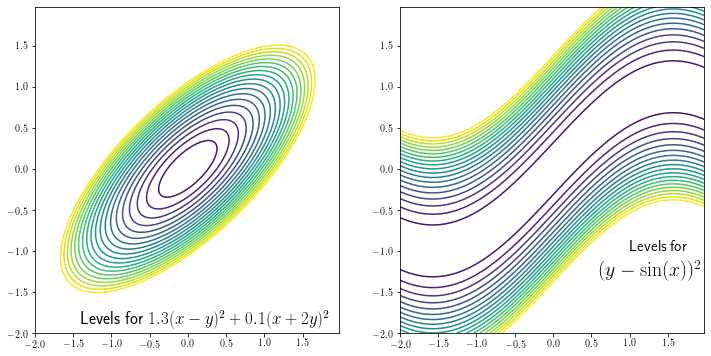

In [5]:
def convex_function(x, y):
    return 1.3 * (x - y) ** 2 + 0.1 * (x + 2 * y) ** 2

def non_convex_function(x, y):
    return (y - np.sin(x)) ** 2

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

#Level contours
delta = 0.025
x = np.arange(-2, 2, delta)
y = np.arange(-2, 2, delta)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)
V = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i][j] = convex_function(X[i][j], Y[i][j])
        V[i][j] = non_convex_function(X[i][j], Y[i][j])

axs[0].contour(X, Y, Z, [(i / 10) for i in range(20)]);
axs[1].contour(X, Y, V, [(i / 10) for i in range(20)]);

axs[0].text(-1.4, -1.9, "Levels for $1.3(x-y)^2+0.1(x+2y)^2$", fontsize=17);
axs[1].text(1, -1, "Levels for", fontsize=15)
axs[1].text(0.6, -1.3, "$(y-\sin(x))^2$", fontsize=20)

plt.show()

<b>Теорема.</b> $f:\mathcal{D}\rightarrow \mathbb{R}$ является выпуклой функцией тогда и только тогда, когда надграфик (эпиграф)
$$
\mathbb{E}_f=\{(x, t)~|~t\geq f(x),~x\in\mathcal{D},~t\in\mathbb{R}\}
$$
является выпуклым множеством.

<b>Доказательство</b>. "$\Rightarrow$": Если $(x, u), (y, v)\in\mathbb{E}_f$, $t\in[0; 1]$, то из выпуклости $f$ следует
$$
tu+(1-t)v\geq tf(x)+(1-t)f(y)\geq f(tx+(1-t)y)
$$
а значит $t(x, u)+(1-t)(y, v)\in \mathbb{E}_f$ по определению.

"$\Leftarrow$": Пусть $x, y\in\mathcal{D}$, тогда $(x, f(x)), (y, f(y))\in\mathbb{E}_f$, из выпуклости $\mathbb{E}_f$ получаем что при $t\in[0;1]$
$$
t(x, f(x))+(1-t)(y, f(y)\in\mathbb{E}_f
$$
из чего следует 
$$
tf(x)+(1-t)f(y)\geq f(tx+(1-t)y)~\#
$$

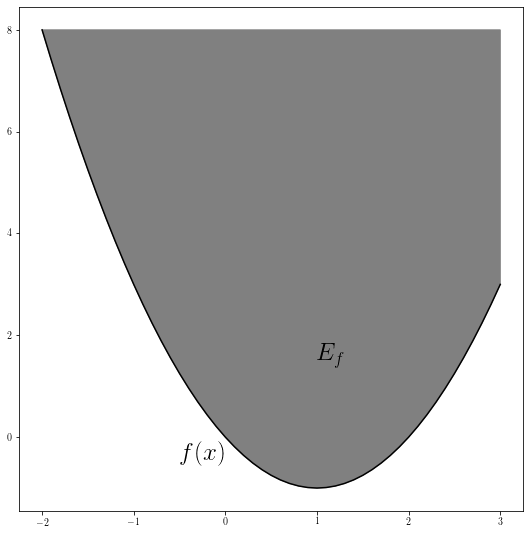

In [6]:
def epigraph(x=-1.0, y=2.0, t=0.6):
    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_axes([0, 0, 1, 1])    
    
    r = list(np.arange(-2, 3.1, 0.1))
    q = [f(_x) for _x in r]
    
    ax.plot([_x for _x in r], [f(_x) for _x in r], color='black')
    r.append(r[-1])
    q.append(max(q[0], q[-1]))
    r.append(r[0])
    q.append(q[0])

    ax.fill([_x for _x in r], [_y for _y in q], color='grey')
    ax.text(1, f(1) + 2.5, "$E_f$", fontsize=25)
    ax.text(-0.5, f(-0.5) - 1.7, "$f(x)$", fontsize=25)
    
    plt.close(fig)
    return fig

epigraph()

## Опорная функция и выпуклая оболочка
<b>Определение</b>. Функция
$$
\phi_\mathcal{D}(x):=\sup_{y\in\mathcal{D}}\langle x, y \rangle.
$$
называется <b>опорной функцией</b> множества $\mathcal{D}$. 

In [7]:
def ellipse(t):
    return np.array([2 * np.sin(t), np.cos(t)])

def tangent(t):
    return np.array([2 * np.cos(t), -np.sin(t)])

def norm(t):
    tan = tangent(t)
    return np.array([tan[1], -tan[0]]) / np.linalg.norm(tan)

@interact(t=(0, 2 * np.pi, 0.1))
def draw_support_plane(t=1.3):
    fig = plt.figure(figsize=(8, 4))
    ax = fig.add_axes([0, 0, 1, 1])
    
    ax.set_xlim((-5, 5))
    ax.set_ylim((-2.5, 2.5))
    
    r = np.arange(0, 2 * np.pi + 0.1, 0.1)
    
    point = ellipse(t)
    tan = tangent(t)
    tan = tan / np.linalg.norm(tan)
    
    nrm = norm(t)
    
    ax.plot([ellipse(_t)[0] for _t in r], [ellipse(_t)[1] for _t in r], color='black')
    ax.plot([point[0] - tan[0], point[0] + tan[0]], [point[1] - tan[1], point[1] + tan[1]], color='blue')
    ax.arrow(point[0], point[1], -nrm[0], -nrm[1], head_width=0.2, head_length=0.1, 
             overhang=0.5, fc='k', ec='k', color='blue')
    ax.text(point[0] - nrm[0] + 0.2, point[1] - nrm[1] + 0.2, r"$c$", fontsize=25)
    ax.text(0, 0, r"$\mathcal{K}$", fontsize=20)
    ax.text(point[0] + 0.1, point[1] + 0.1, r"$x^*$", fontsize=25)
    ax.text(0, -1.5, r"$x^*=argmax_\mathcal{K}\langle c, x\rangle$", fontsize=25)
    
    ax.scatter([point[0]], [point[1]], color='black')
    
    plt.close(fig)
    return fig

draw_support_plane();

interactive(children=(FloatSlider(value=1.3, description='t', max=6.283185307179586), Output()), _dom_classes=…

<b>Теорема (О представлении замкнутых выпуклых множеств).</b>
Пусть $\mathcal{D}\in \mathbb{R}^n$ -- замкнутое выпуклое множество, тогда 
$$
\mathcal{D}=\cap_{x\in \mathbb{R}^n}\{y\in \mathbb{R}^n~|~\langle x, y\rangle\leq \phi_\mathcal{D}(x)\}
$$
<b>Доказательство.</b> "$\Rightarrow$" Если $x\in \mathcal{D}$, то для любого $z\in\mathbb{R}^n$: $\langle z, x\rangle\leq \sup_{y\in\mathcal{D}}\langle z, y\rangle=\phi_\mathcal{D}(z)$, т. е. $x\in \{y\in \mathbb{R}^n~|~\langle z, y\rangle\leq \phi_\mathcal{D}(z)\}$, а значит $x$ принадлежит соответствующему пересечению.

"$\Leftarrow$" Пусть $x\notin \mathcal{D}$, $\mathcal{D}$ -- замкнуто, то существуют $a\in \mathbb{R}^n, c\in \mathbb{R}$ (разделяющая гиперплоскость) такие, что
$$
\left\{\begin{array}{ll}
\langle a, y \rangle\leq c~~\forall y\in \mathcal{D},\\
\langle a, x \rangle>c.
\end{array}\right.
$$
Таким образом
$$
\phi_\mathcal{D}(a)=\sup_{y\in\mathcal{D}}\langle a, y\rangle\leq c,
$$
а значит $x\notin \{z\in \mathbb{R}^n~|~\langle z, a\rangle \leq \varphi_\mathcal{D}(a)\}$ и, следовательно, $\mathcal{D}$ совпадает с указанным пересечением. $\#$